In [26]:
# %pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import plotly
LANDING_DATA_DIR = "../../data/landing"
RAW_DATA_DIR = "../../data/raw"
CURATED_DATA_DIR = "../../data/curated"

# Reading and data overview

In [2]:
# historical dataset from 2017 to 2021
historical = pd.read_csv(
                (f"{LANDING_DATA_DIR}/historical_data/"
                "apm-restricted-vic-apm-point-for-rent-vic-na.csv"))
historical.head()

C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\297282489.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  historical = pd.read_csv(


,FID,propertycategorisation,streetname,streettype,suburb,postcode,state,sa1code,eventdate,eventprice,...,hasmountainview,advertlinkexternalid,property_latitude,property_longitude,street_centroid_latitude,street_centroid_longitude,month,year,gid,the_geom
0,apm_point_for_rent_vic.189,House,Smith,St,Coburg,3058,VIC,NaN,2021-06-30,580.0,...,NaN,15184169.0,NaN,NaN,NaN,NaN,6,2021,189,NaN
1,apm_point_for_rent_vic.315,House,Barnard,St,Sunshine,3020,VIC,NaN,2021-04-21,360.0,...,NaN,14925285.0,NaN,NaN,NaN,NaN,4,2021,315,NaN
2,apm_point_for_rent_vic.386,Unit,Any,St,Elwood,3184,VIC,NaN,2021-05-26,NaN,...,NaN,11296097.0,NaN,NaN,NaN,NaN,5,2021,386,NaN
3,apm_point_for_rent_vic.430,Unit,McIlwraith,St,Carlton,3053,VIC,NaN,2021-06-02,400.0,...,NaN,13259379.0,NaN,NaN,NaN,NaN,6,2021,430,NaN
4,apm_point_for_rent_vic.926,House,Williams,St,Essendon,3040,VIC,NaN,2018-06-13,675.0,...,NaN,12197953.0,NaN,NaN,NaN,NaN,6,2018,926,NaN


In [3]:
print(historical.columns)

Index(['FID', 'propertycategorisation', 'streetname', 'streettype', 'suburb',
       'postcode', 'state', 'sa1code', 'eventdate', 'eventprice',
       'eventtypecode', 'firstadvertisedeventdate',
       'firstadvertisedeventprice', 'lastadvertisedeventdate',
       'lastadvertisedeventprice', 'finalresulteventdate',
       'finalresulteventprice', 'finalresulteventtypecode', 'propertytype',
       'areasize', 'bedrooms', 'baths', 'parking', 'hasstudy',
       'hasseparatedining', 'hasfamilyroom', 'hassunroom', 'hasbilliardroom',
       'hasrumpusroom', 'hasfireplace', 'haswalkinwardrobe', 'hascourtyard',
       'hasinternallaundry', 'hasheating', 'hassauna', 'hasairconditioning',
       'hasbalcony', 'hasbarbeque', 'haspolishedtimberfloor', 'hasensuite',
       'hasspa', 'hasgarage', 'haslockupgarage', 'haspool', 'hastenniscourt',
       'hasbeenrenovated', 'hasalarm', 'haswaterview', 'hasharbourview',
       'hasoceanview', 'hascityview', 'hasbushview', 'hasdistrictview',
       'hasb

In [4]:
historical['propertytype'].value_counts()

House        459860
Unit         442056
Townhouse     82168
Studio         7621
Terrace        5288
Villa          1757
Duplex          916
Semi            325
Flat              9
Name: propertytype, dtype: int64

In [5]:
def retain_columns(df, columns):
    """
    This function retains certain columns from the dataframe
    """
    return df[columns]
historical = pd.read_csv((f"{LANDING_DATA_DIR}/historical_data/"
                          "apm-restricted-vic-apm-point-for-rent-vic-na.csv"))
retain_cols = ['FID', 'suburb', 'postcode', 'eventdate', 'eventprice', 
               'advertlinkexternalid', 'parking',
               'propertytype', 'bedrooms', 'baths', 'year', 'the_geom']
historical = retain_columns(historical, retain_cols)

# outliers
historical = historical[~historical['the_geom'].isna()]
historical = historical[~historical['eventprice'].isna()]
historical = historical[historical['eventprice'] <= 10000]
print(historical.shape)
historical.head()

C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\542109816.py:6: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  historical = pd.read_csv((f"{LANDING_DATA_DIR}/historical_data/"


(960638, 12)


,FID,suburb,postcode,eventdate,eventprice,advertlinkexternalid,parking,propertytype,bedrooms,baths,year,the_geom
166,apm_point_for_rent_vic.42364,MacLeod,3085,2021-06-03,210.0,8530715.0,NaN,Studio,NaN,1.0,2021,POINT (-37.71454 145.0609)
243,apm_point_for_rent_vic.75192,Moonee Ponds,3039,2021-05-02,335.0,15483483.0,1.0,Unit,1.0,1.0,2021,POINT (-37.76507 144.9205)
264,apm_point_for_rent_vic.82006,Malvern East,3145,2021-04-28,195.0,NaN,NaN,Studio,NaN,1.0,2021,POINT (-37.8783 145.0484)
267,apm_point_for_rent_vic.82912,Footscray,3011,2021-05-02,470.0,NaN,1.0,Unit,1.0,1.0,2021,POINT (-37.79947 144.91)
357,apm_point_for_rent_vic.120723,Chadstone,3148,2021-04-21,380.0,14896686.0,1.0,Unit,2.0,1.0,2021,POINT (-37.87626 145.0935)


In [6]:
# Missing values
# this does not affect the quality of the data
historical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960638 entries, 166 to 999999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FID                   960638 non-null  object 
 1   suburb                960638 non-null  object 
 2   postcode              960638 non-null  int64  
 3   eventdate             960638 non-null  object 
 4   eventprice            960638 non-null  float64
 5   advertlinkexternalid  951898 non-null  float64
 6   parking               894063 non-null  float64
 7   propertytype          960638 non-null  object 
 8   bedrooms              957189 non-null  float64
 9   baths                 960033 non-null  float64
 10  year                  960638 non-null  int64  
 11  the_geom              960638 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 95.3+ MB


# Aggregate by suburb, year

In [7]:
hist_2023 = pd.read_csv(f"{CURATED_DATA_DIR}/real_estate_2023_full.csv")
hist_2026 = pd.read_csv(f"{CURATED_DATA_DIR}/real_estate_2026_pred.csv")
hist_2026['suburbs'] = hist_2023['suburbs']
hist_2026 = hist_2026.rename({"prediction": "price_per_week"}, axis = 1)

def fill_avg_rent(suburb, property_type, hist_2023):
    clean_name = suburb.lower().strip()
    if not property_type: 
        sub_2023 = hist_2023[hist_2023['suburbs'].str.contains(clean_name)]
    else:
        if property_type in ['House', 'Townhouse']:
            sub_2023 = hist_2023[(hist_2023['suburbs'].str.contains(clean_name)) 
                    & (hist_2023['property_type'] == property_type)]
        elif property_type == 'Unit':
            sub_2023 = hist_2023[(hist_2023['suburbs'].str.contains(clean_name)) 
                    & (hist_2023['property_type'].str.contains("Apartment"))]
    if sub_2023.shape[0] == 0:
        return np.nan
    avg_rent = np.mean(sub_2023['price_per_week'])
    return avg_rent


def extract_agg_sub(df, year, property_type):
    # find the overall growth instead of each property category growth
    if not property_type:
        return df[df['year'] == year].groupby("suburb").mean()[['eventprice']]
    # filter the desired year and property type and agg by suburb to find 
    # mean of price
    return (df[(df['year'] == year) & (df['propertytype']==property_type)]
            .groupby("suburb").mean()[['eventprice']])
    

def statistical_historical(historical, future_df , property_type = None):
    """
    Args:
        property_type: one of these 3 values: ['Unit', 'House', 'Townhouse', 
            None]
            if property_type = None, calculate the overall growth of suburbs
            over the years
        
        historical: historical data from 2017 to 2021
        future_df: real estate projected data in 2026
    
    Returns a dataframe with a list of suburbs and descending order of price 
    growth rate
    """

    # extract the mean price for the specified property_type in year = 2017(e.g)
    hist_2017 = extract_agg_sub(historical, 2017, property_type)
    hist_2018 = extract_agg_sub(historical, 2018, property_type)
    hist_2019 = extract_agg_sub(historical, 2019, property_type)
    hist_2020 = extract_agg_sub(historical, 2020, property_type)
    hist_2021 = extract_agg_sub(historical, 2021, property_type)
    print(hist_2017.shape)
    print(hist_2018.shape)
    print(hist_2019.shape)
    print(hist_2020.shape)
    print(hist_2021.shape)
    
    # merge the statistics by the years vertically:
    # sample desired output: (nrows, 5),5 cols correspond to 5 years from 2017 
    # to 2021, and nrows is the number of suburbs 
    sample = hist_2017.merge(hist_2018, left_index = True, right_index = True, 
                             how = 'left')
    sample = sample.rename({"eventprice_x": 2017, "eventprice_y": 2018},
                            axis = 1)
    sample = sample.merge(hist_2019, left_index = True, right_index = True, 
                          how = 'left')
    sample = sample.merge(hist_2020, left_index = True, right_index = True, 
                          how = 'left')
    sample = sample.rename({"eventprice_x": 2019, "eventprice_y": 2020}
                           , axis = 1)
    sample = sample.merge(hist_2021, left_index = True, right_index = True, 
                          how = 'left')
    sample = sample.rename({"eventprice": 2021}, axis = 1)
    
    # merge mean price in a suburb in 2023
    sample2 = sample.copy().reset_index()
    # create null values
    sample2[2023] = None
    # calculate  mean price for the specified property_type in 2023
    sample2[2023] = sample2['suburb'].apply(
        lambda x: fill_avg_rent(x, property_type, hist_2023))

    # calculate  mean price for the specified property_type in 2026
    sample2[2026] = None
    sample2[2026] = sample2['suburb'].apply(
        lambda x: fill_avg_rent(x, property_type, future_df))


    # calculate growth rate
    sample2['growth_2018_2023'] = (sample2[2023] - sample2[2018])/sample2[2018]
    sample2['growth_2018_2026'] = (sample2[2026] - sample2[2018])/sample2[2018]


    sample2 = sample2.sort_values(by = 'growth_2018_2023', ascending = False)
    return sample2

# suburbs with descending order of growth rate
# top rows are those with highest growth 
house_growth = statistical_historical(historical, property_type = 'House', 
                                      future_df = hist_2026)
apartment_growth = statistical_historical(historical, property_type = 'Unit', 
                                          future_df = hist_2026)
townhouse_growth = statistical_historical(historical, 
                                          property_type = 'Townhouse', 
                                          future_df = hist_2026)
overall_growth = statistical_historical(historical, future_df= hist_2026)

# House                            5544
# Apartment / Unit / Flat          4677
# Townhouse                        1166

C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

(299, 1)
(1325, 1)
(337, 1)
(299, 1)
(917, 1)


C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

(202, 1)
(634, 1)
(199, 1)
(193, 1)
(531, 1)


C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return (df[(df['year'] == year) & (df['propertytype']==property_type)]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

(14, 1)
(533, 1)
(28, 1)
(23, 1)
(450, 1)


C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df[df['year'] == year].groupby("suburb").mean()[['eventprice']]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df[df['year'] == year].groupby("suburb").mean()[['eventprice']]
C:\Users\DELL 7590\AppData\Local\Temp\ipykernel_18208\2522543561.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

(361, 1)
(1329, 1)
(398, 1)
(358, 1)
(928, 1)


In [8]:
house_growth.head(10)

,suburb,2017,2018,2019,2020,2021,2023,2026,growth_2018_2023,growth_2018_2026
93,Docklands,645.000000,486.851852,NaN,NaN,486.282051,1597.500000,1286.184354,2.281286,1.641839
167,Maindample,295.000000,297.777778,NaN,NaN,NaN,804.769231,542.485329,1.702583,0.821779
200,Nhill,150.000000,190.222222,NaN,NaN,246.250000,453.928571,527.636005,1.386307,1.773787
174,Meeniyan,71.000000,214.450000,71.00,NaN,301.818182,454.166667,495.034042,1.117821,1.308389
296,Yarram,290.000000,273.985816,NaN,NaN,320.000000,566.000000,684.553072,1.065800,1.498498
65,Chewton,280.000000,322.830189,NaN,NaN,368.000000,622.500000,552.985099,0.928258,0.712929
143,Huntly,290.000000,330.980392,330.00,378.0,414.117647,626.296296,614.879615,0.892246,0.857752
12,Ascot,370.000000,341.858407,NaN,NaN,422.692308,640.769231,659.658041,0.874370,0.929624
289,Williamstown,609.750000,656.258542,725.00,710.0,646.090129,1158.750000,1098.550665,0.765691,0.673960
184,Moe,235.714286,235.497368,273.75,270.0,314.000000,410.000000,460.922333,0.740996,0.957229


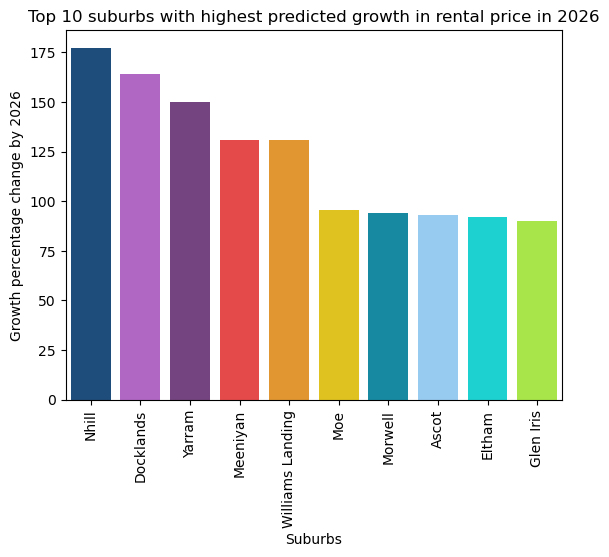

In [9]:
color_lst = ['#104E8B', '#009ACD', '#87CEFA', '#00EEEE', '#ADFF2F', '00CD66',
             '#008B45', '#20B2AA', '#BA55D3', '#7A378B', '#FF3030', '#FF9912',
             '#FFD700']
color_lst = ['#104E8B', '#BA55D3', '#7A378B', '#FF3030', '#FF9912',
             '#FFD700', '#009ACD', '#87CEFA', '#00EEEE', '#ADFF2F', '#00CD66',
             '#008B45', '#20B2AA']
color_lst = [(0.06274509803921569, 0.3019607843137255, 0.5411764705882353, 1.0),
        (0.7254901960784314, 0.3411764705882353, 0.8235294117647059, 1.0),
        (0.47843137254901963, 0.22745098039215686, 0.5411764705882353, 1.0),
        (1.0, 0.18823529411764706, 0.18823529411764706, 1.0),
        (1.0, 0.603921568627451, 0.07450980392156862, 1.0),
        (1.0, 0.8470588235294118, 0.0, 1.0),
        (0.0, 0.6000000000000001, 0.7254901960784314, 1.0),
        (0.5372549019607843, 0.803921568627451, 1.0, 1.0),
        (0.0, 0.9372549019607843, 0.9372549019607843, 1.0),
        (0.6784313725490196, 1.0, 0.18823529411764706, 1.0),
        (0.0, 0.807843137254902, 0.41568627450980394, 1.0),
        (0.0, 0.5333333333333333, 0.2857142857142857, 1.0),
        (0.12549019607843137, 0.6901960784313725, 0.6666666666666666, 1.0)]
def visualize_2023_2026(df, title):
    """Visualizes the top 10 suburbs with the highest predicted growth in price
    in 2026.

    Args:
        df: A DataFrame containing the suburb and growth percentage change data.
        title: The title of the plot.
    """
    plt.figure()
    # sort by descending order
    plot_data = (df.sort_values(by = 'growth_2018_2026', 
                                ascending = False).head(10))
    # calculate to %
    plot_data['growth_2018_2026'] *= 100
    sns.barplot(data = plot_data, x = 'suburb', y = 'growth_2018_2026', 
                palette=color_lst)

    plt.xticks(rotation = 90)
    plt.xlabel("Suburbs")
    plt.ylabel("Growth percentage change by 2026")
    plt.title(("Top 10 suburbs with highest predicted "
              "growth in rental price in 2026"))
    plt.savefig(f"../../plots/lgbm_{title}.png", dpi = 800, 
                bbox_inches = 'tight')

visualize_2023_2026(house_growth, title = 'house_growth')

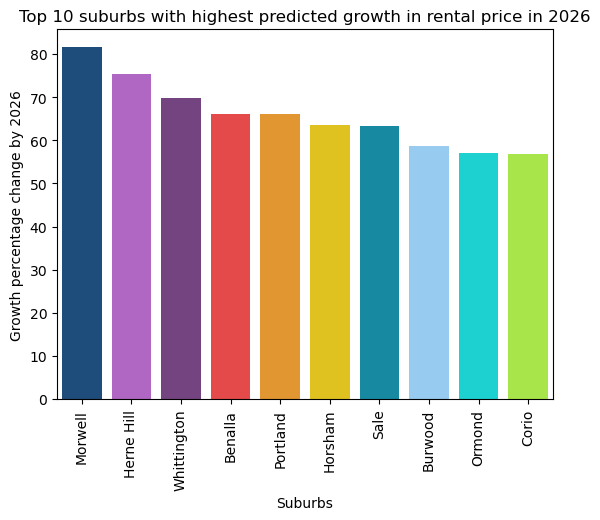

In [10]:
visualize_2023_2026(apartment_growth, title = 'apartment_growth')


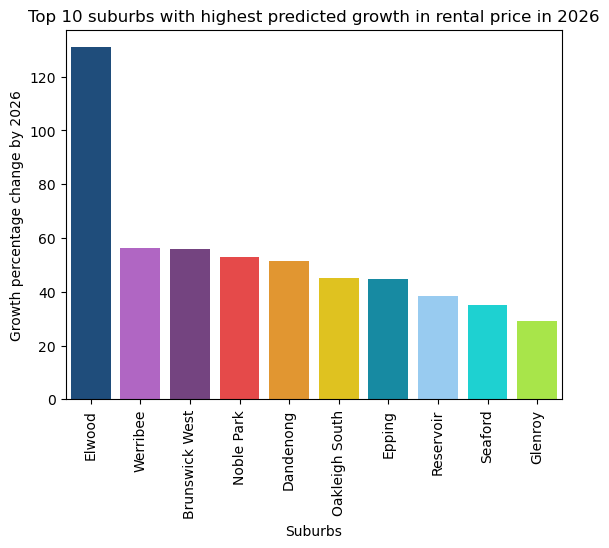

In [11]:
visualize_2023_2026(townhouse_growth, title = 'townhouse_growth')


# Paralell coordinates viz

     2017        2018        2021         2023          suburb
4   320.0  596.230352  459.629630  1530.000000          Elwood
1   490.0  492.978469  486.686047   839.784615  Brunswick West
9   420.0  387.030364  389.899598   571.923077      Noble Park
11  360.0  414.168936  408.429803   595.503205       Reservoir
10  625.0  566.428571  570.491803   813.333333  Oakleigh South
12  350.0  426.691489  489.240506   592.500000         Seaford
3   390.0  385.778894  395.462882   527.398601       Dandenong
0   680.0  604.379085  489.800000   806.471154  Box Hill South
13  245.0  358.811475  342.387387   475.000000        Werribee
5   330.0  365.144385  388.495146   480.000000          Epping


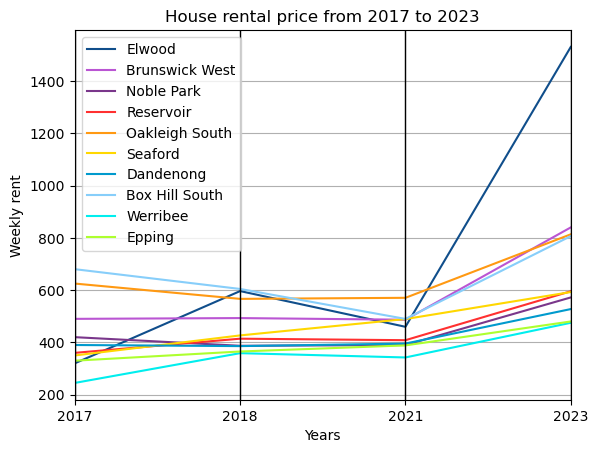

In [12]:
import numpy as np 
color_lst = ['#104E8B', '#BA55D3', '#7A378B', '#FF3030', '#FF9912',
             '#FFD700', '#009ACD', '#87CEFA', '#00EEEE', '#ADFF2F', '#00CD66',
             '#008B45', '#20B2AA',]
def plot_parallel(df, title):
    plt.figure()
    df = df[[2017,2018, 2021, 2023, 'suburb']]
    print(df.head(10))
    pd.plotting.parallel_coordinates(
    df.head(10), class_column='suburb', color=color_lst)
    plt.legend(loc = 'upper left')
    plt.title("House rental price from 2017 to 2023")
    plt.xlabel("Years")
    plt.ylabel("Weekly rent")
    plt.savefig(f"../../plots/paralell_{title}.png", 
                bbox_inches = 'tight', dpi = 600)

plot_parallel(townhouse_growth, title = 'townhouse_growth')

           2017        2018        2021        2023         suburb
37   310.000000  285.853659  352.307692  600.000000    Castlemaine
89   200.000000  225.705128  268.384615  390.714286     Herne Hill
93   162.500000  215.299658  338.563218  370.000000        Horsham
197  260.000000  241.534653  277.656250  404.375000    Whittington
162  210.714286  226.466775  306.323529  373.670330           Sale
152  173.000000  219.569536  514.146341  354.000000       Portland
13   145.000000  199.606061  275.945946  320.000000        Benalla
21   313.941176  361.060296  351.567619  566.052036       Box Hill
31   265.000000  337.847712  320.137821  528.013133        Burwood
175  400.000000  450.754032  393.493724  704.169785  St Kilda West


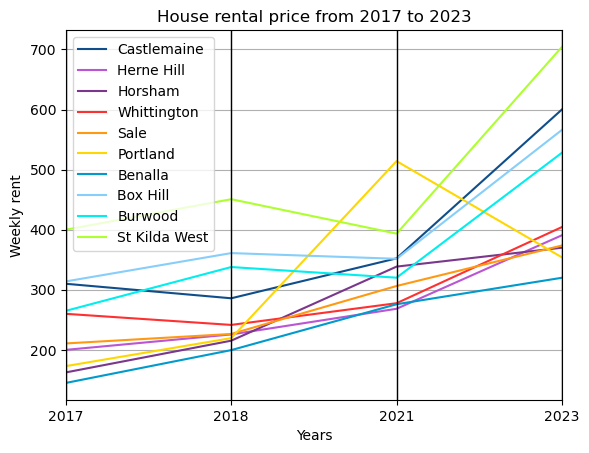

In [13]:
plot_parallel(apartment_growth, title = 'apartment_growth')


           2017        2018        2021         2023        suburb
93   645.000000  486.851852  486.282051  1597.500000     Docklands
167  295.000000  297.777778         NaN   804.769231    Maindample
200  150.000000  190.222222  246.250000   453.928571         Nhill
174   71.000000  214.450000  301.818182   454.166667      Meeniyan
296  290.000000  273.985816  320.000000   566.000000        Yarram
65   280.000000  322.830189  368.000000   622.500000       Chewton
143  290.000000  330.980392  414.117647   626.296296        Huntly
12   370.000000  341.858407  422.692308   640.769231         Ascot
289  609.750000  656.258542  646.090129  1158.750000  Williamstown
184  235.714286  235.497368  314.000000   410.000000           Moe


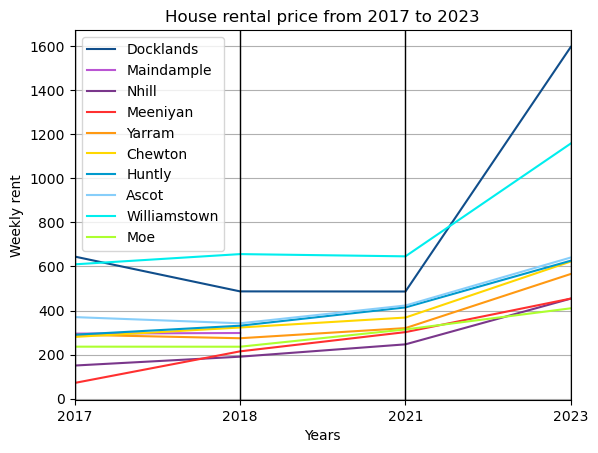

In [14]:
plot_parallel(house_growth, title = 'house_growth')
